In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\aakas\AppData\Local\Temp\ipykernel_13712\2769132933.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [26]:
df = pd.read_excel("TSLA.xlsx",index_col=None)
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
1,1,2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2,2,2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
3,3,2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
4,4,2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


In [27]:
df = df.drop("Unnamed: 0",axis=1)

In [28]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
1,2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2,2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
3,2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
4,2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


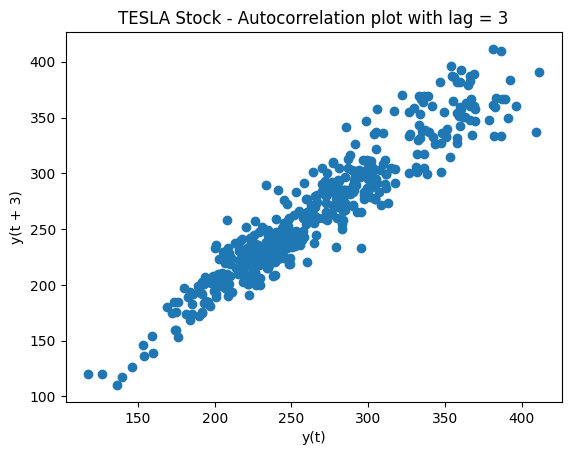

In [29]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

We can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).

Finally, let’s plot the stock price evolution over time.

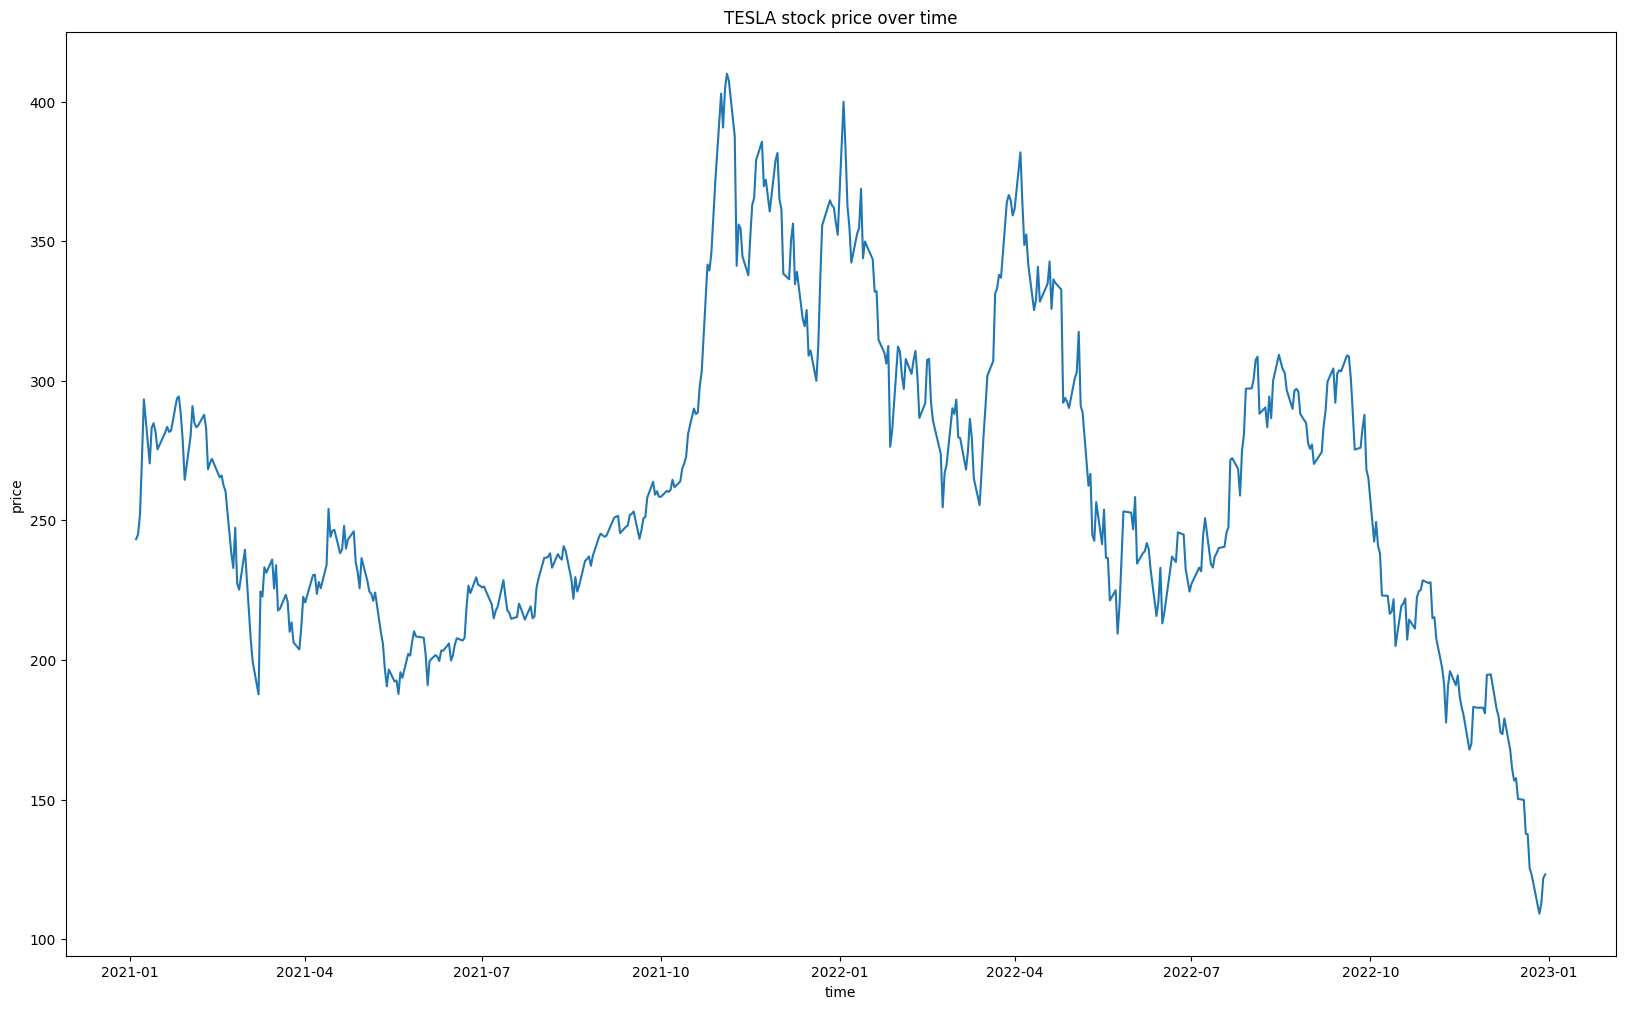

In [30]:
plt.figure(figsize=(20,12))
plt.plot(df["Date"], df["Close"])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

# Next, let’s divide the data into a training (70 % ) and test (30%) set.
we select the following ARIMA parameters: p=4, d=1 and q=0.

In [31]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values

In [32]:
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

In [34]:
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

In [35]:
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))


Testing Mean Squared Error is 78.41698694501336


In [36]:
test_set_range = df[int(len(df)*0.7):].index

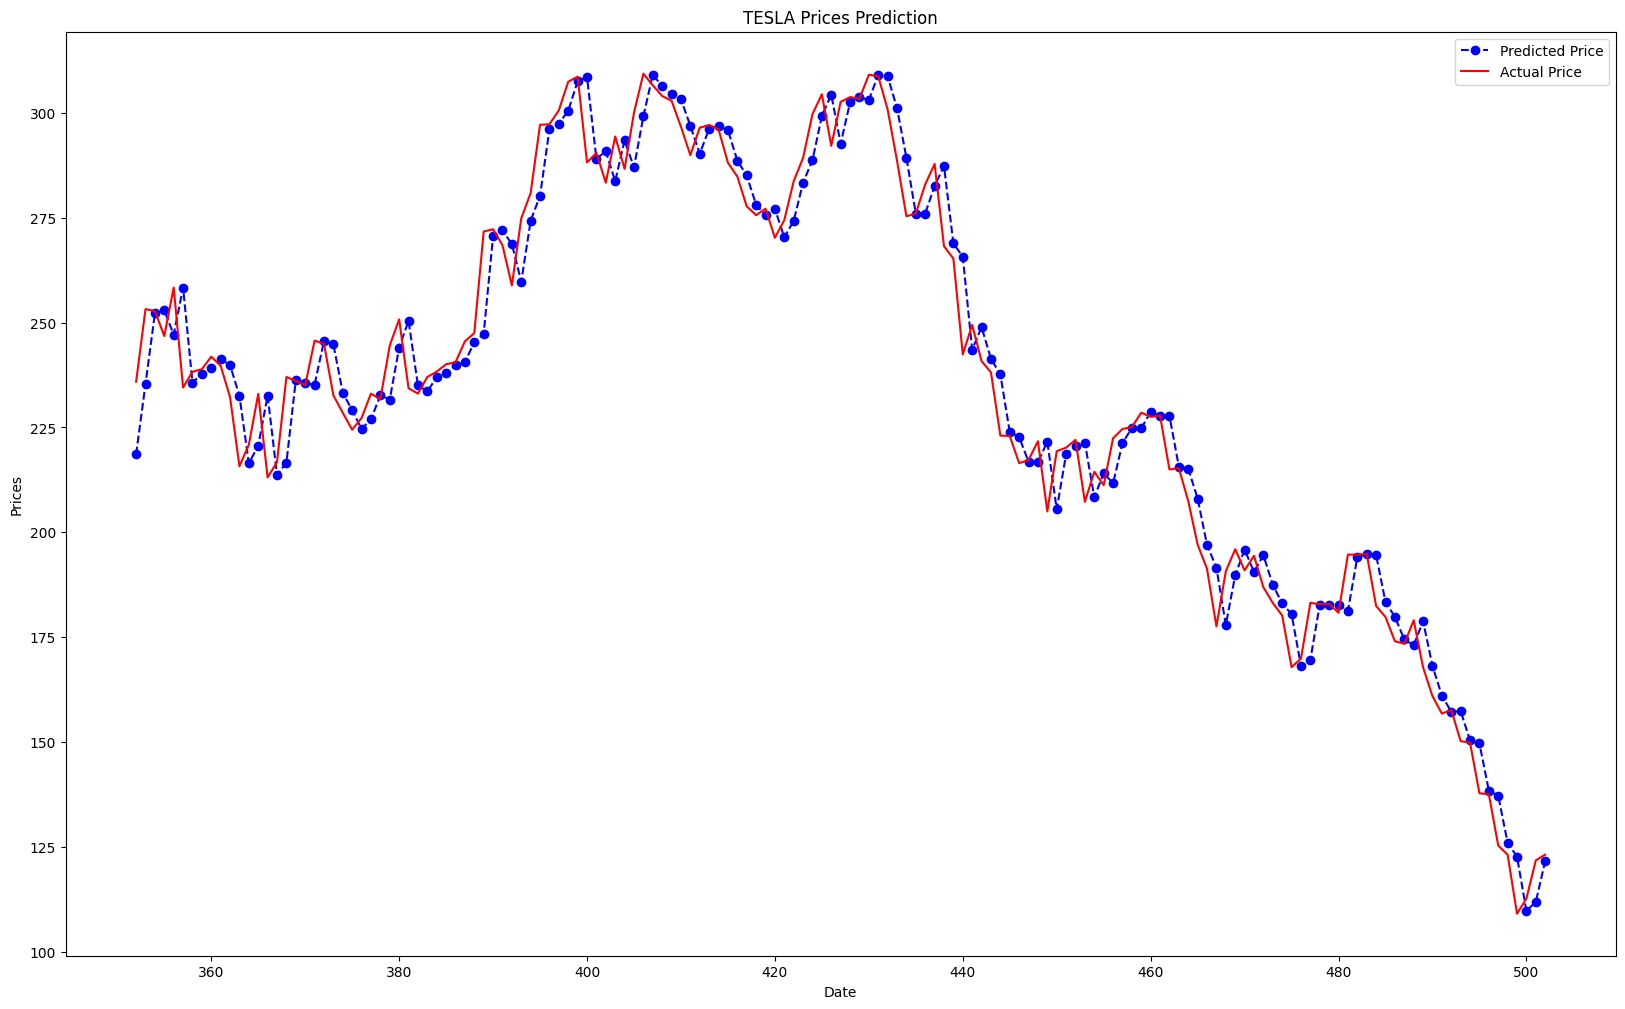

In [41]:
plt.figure(figsize=(20,12))

plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')

plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()
